# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

import numpy as np
import warnings
warnings.simplefilter("ignore")

#Importation de la librairie plotly express
import plotly.express as px


# Charger les données à partir d'un fichier Excel
#On importe les données dans un dataframe
df_historique = pd.read_excel(r"C:\Users\M22O101\Downloads\Openclasroom\Projet 8_102023\historique_immobilier_paris_2017_2021.xlsx")
df_portefeuille_actifs= pd.read_excel(r"C:\Users\M22O101\Downloads\Openclasroom\Projet 8_102023\portefeuille_actifs.xlsx.")
df_echantillon_a_classer=pd.read_excel(r"C:\Users\M22O101\Downloads\Openclasroom\Projet 8_102023\echantillon_a_classer.xlsx")


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [2]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [3]:
df_historique.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
df_historique["type_local"].value_counts()


la liste des différents types de biens immobiliers que nous avons dans les données est ?:


Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: type_local, dtype: int64

On observe qu'il y a ? types de biens, et que leurs codes types sont ?.
On observe qu'il y a 2 types de biens au total, et que leurs codes types sont "Appartement" et "Local industriel, commercial ou assimilé".

In [5]:
calculation = df_historique.groupby(['type_local','code_type_local']).count().reset_index()
calculation.loc[:,:'date_mutation'].rename(columns={'date_mutation':'nombres'})


,type_local,code_type_local,nombres
0,Appartement,2,24353
1,Local industriel. commercial ou assimilé,4,1843


 On Observe qu'il ya 2 types des biens les" appartement" et les " local indistriel commercial ou assimilé " ainsi que leurs codes types sont 2 et 3


### 3. Nombre de transactions

In [6]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est '+ str(np.shape(df_historique)[0]))
print('le nombre de transactions pour les appartements dans les données est '+ str(np.shape(df_historique.loc[df_historique['code_type_local']==2])[0]))
print('le nombre de transactions pour les locaux commerciaux dans les données est '+ str(np.shape(df_historique.loc[df_historique['code_type_local']==4])[0]))


le nombre de transactions dans les données est 26196
le nombre de transactions pour les appartements dans les données est 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


In [7]:
for type_local in df_historique["code_type_local"].unique():
    print(f"Nombre de transactions pour le type de bien {type_local} :", len(df_historique[df_historique["code_type_local"] == type_local]))
print("Nombre total de transactions :", len(df_historique))

Nombre de transactions pour le type de bien 2 : 24353
Nombre de transactions pour le type de bien 4 : 1843
Nombre total de transactions : 26196


### 4. interval de l'historique des données

In [8]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ?',df_historique.date_mutation.min())
print('la dernière date de transaction dans les données est le ?',df_historique.date_mutation.max())



la première date de transaction dans les données est le ? 2017-01-02 00:00:00
la dernière date de transaction dans les données est le ? 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
# Calcul de la colonne
df_historique['prix_m2'] = df_historique.valeur_fonciere/df_historique.surface_reelle
df_historique['commun_number'] = df_historique['nom_commune'].str.extract('(\d+)')

<Axes: title={'center': 'prix_m2'}, xlabel='commun_number'>

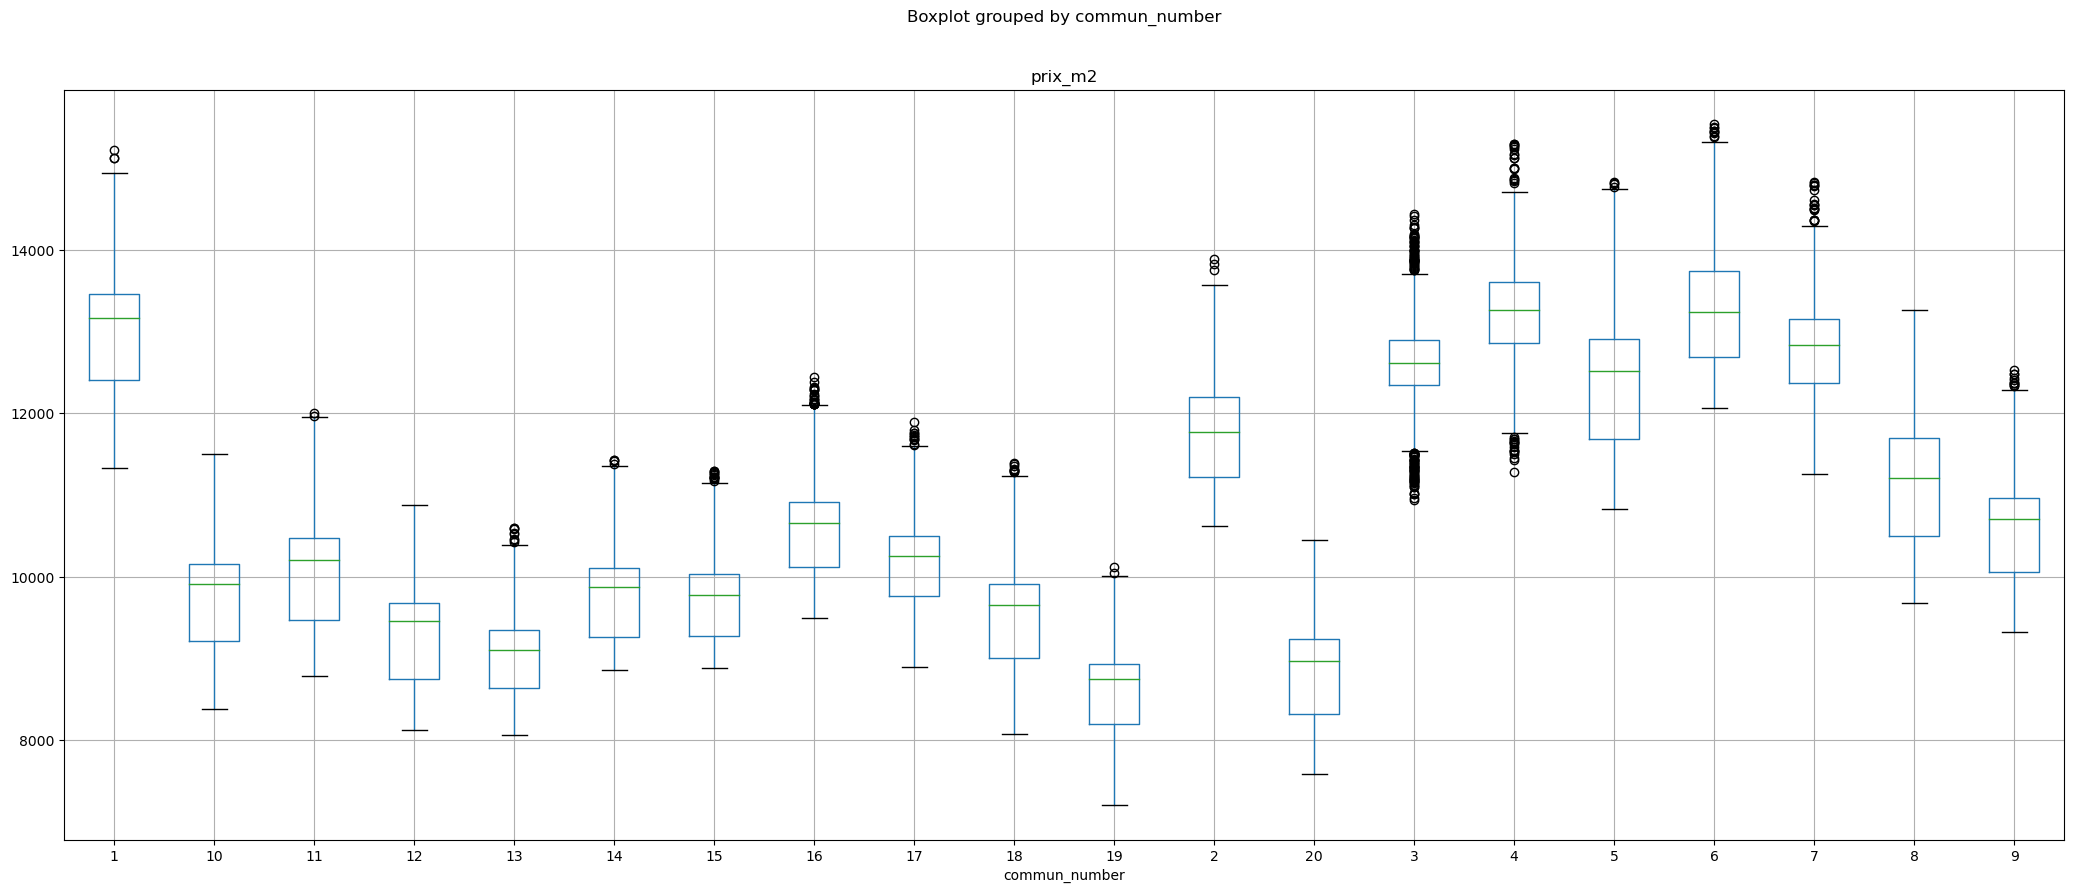

In [10]:
df_historique.boxplot("prix_m2", by=("commun_number"),figsize=(25,10))

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [86]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appartements = df_historique[df_historique["code_type_local"] == 2]
df_appartements['annee'] = df_appartements['date_mutation'].dt.year

# Check if 'prix_m2' exists in the DataFrame
if 'prix_m2' in df_appartements.columns:
    # Prepare a DataFrame by grouping the average sales prices of apartments per year with the associated average surface
    df_appartements_pivot = df_appartements.pivot_table(index="annee",
                                                        values=["prix_m2", "surface_reelle"],
                                                        aggfunc=np.mean)
    df_appartements_pivot.columns = ["prix_moyen", "surface_moyen"]

    df_appartements_pivot

On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

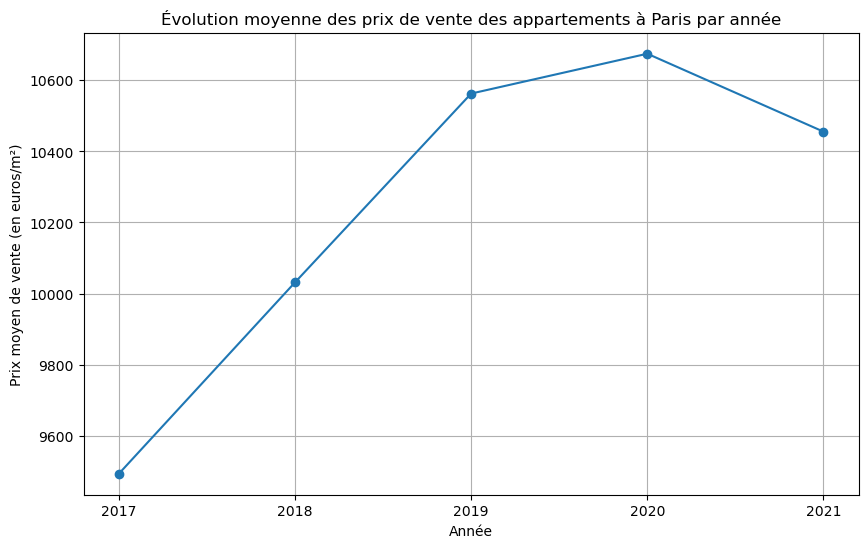

In [12]:

# Création du graphique
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.plot(df_appartements_pivot.index, df_appartements_pivot["prix_moyen"], marker='o')
plt.title('Évolution moyenne des prix de vente des appartements à Paris par année')
plt.xlabel('Année')
plt.ylabel('Prix moyen de vente (en euros/m²)')
plt.grid(True)

# Modification de l'axe x en entiers
plt.xticks(df_appartements_pivot.index.astype(int))

plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos donées

df_appartements = df_historique[df_historique["code_type_local"] == 2]
print("Voici la liste des codes postaux présents dans nos donées :")
df_appartements[['code_postal']].drop_duplicates()

Voici la liste des codes postaux présents dans nos donées :


,code_postal
0,75003
1,75008
4,75001
478,75006
479,75005
483,75007
1072,75010
1074,75009
1579,75011
1581,75012


In [14]:


df_bydistrict = df_appartements[['date_mutation', 'valeur_fonciere', 'code_postal', 'surface_reelle', 'prix_m2']]
df_bydistrict['date_mutation'] = pd.to_datetime(df_bydistrict['date_mutation']).dt.year
df_bydistrict.rename(columns={"date_mutation": "date_year"}, inplace=True)
df_bydistrict = df_bydistrict.groupby(['code_postal', 'date_year']).mean()

print(df_bydistrict)



                       valeur_fonciere  surface_reelle       prix_m2
code_postal date_year                                               
75001       2017         530392.410096       45.241379  11762.706289
            2018         581390.365711       46.010204  12621.226146
            2019         454606.244889       34.307692  13269.256149
            2020         601204.893337       44.871429  13405.991820
            2021         639321.076138       47.777778  13379.498578
...                                ...             ...           ...
75020       2017         313979.407024       39.777070   7886.023336
            2018         316909.306323       37.337461   8485.162808
            2019         322005.372655       35.376093   9093.992492
            2020         316868.857795       33.937729   9329.305302
            2021         340528.706134       37.385455   9114.398249

[100 rows x 3 columns]


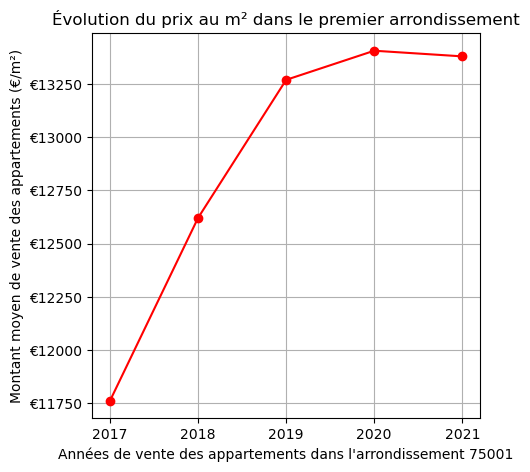

In [15]:


# Données de l'évolution du prix au mètre carré dans le premier arrondissement

plt.figure(figsize=(5, 5))
plt.plot(['2017', '2018', '2019', '2020', '2021'], df_bydistrict.loc[75001, 'prix_m2'], 'o-', color='red')
plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel("Montant moyen de vente des appartements (€/m²)")
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Évolution du prix au m² dans le premier arrondissement')
plt.show()



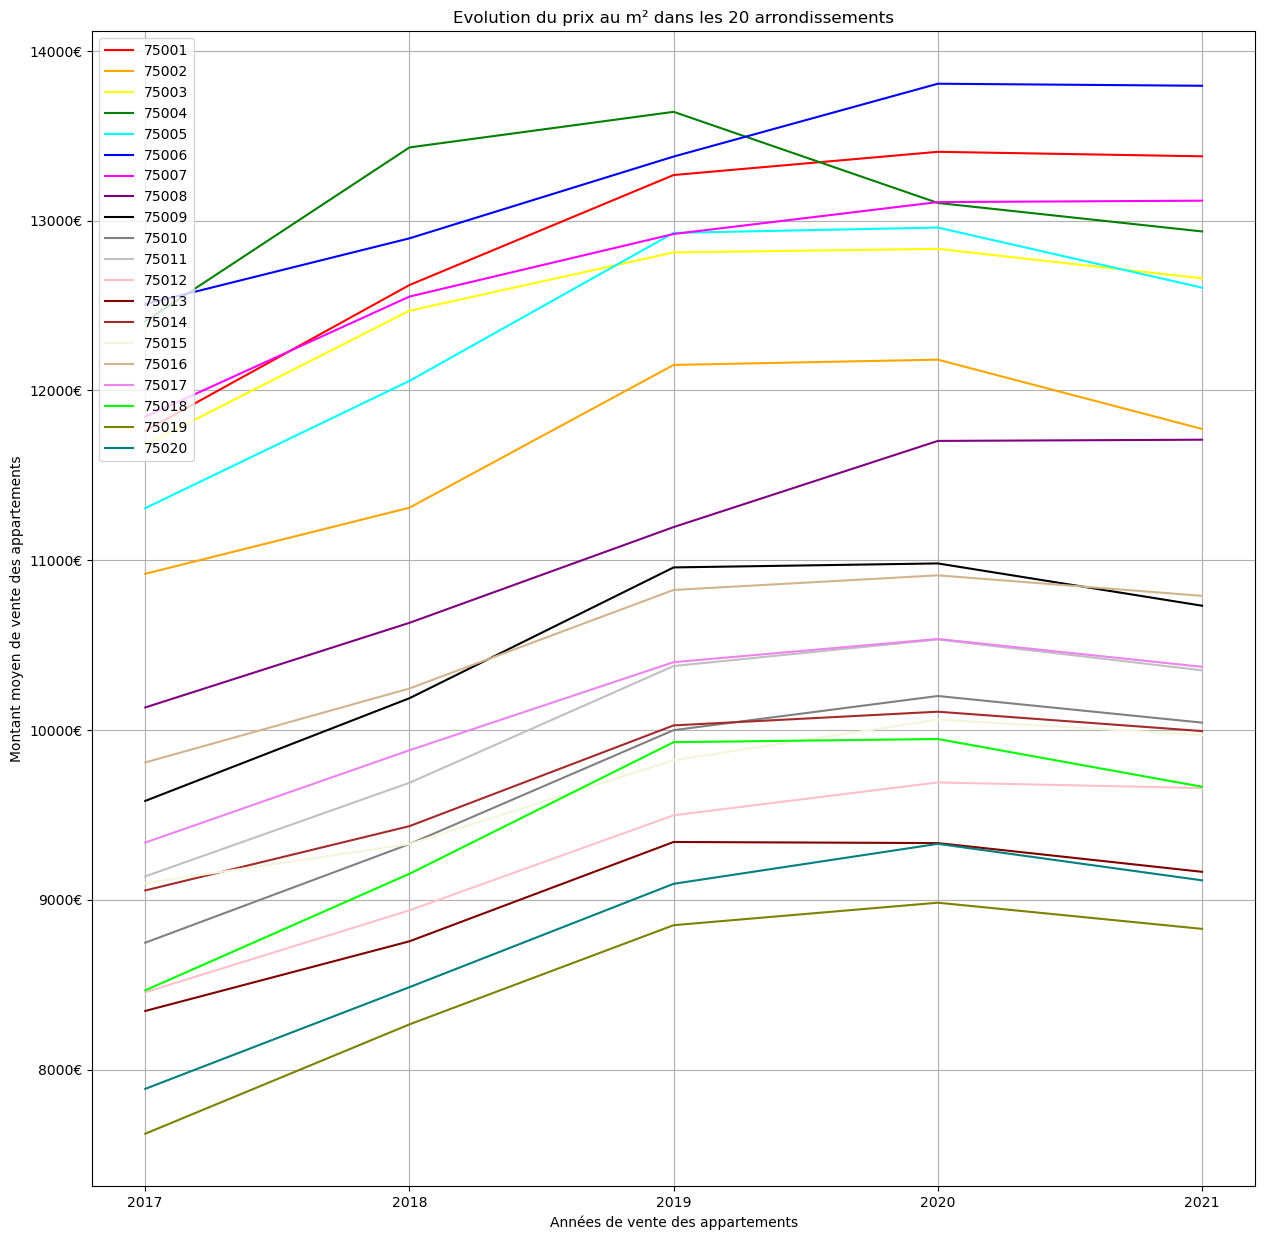

In [16]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
df_evolution2=df_bydistrict.reset_index()
plt.figure(figsize=(15,15))
année=['2017','2018','2019','2020','2021']
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75001]['prix_m2'], color='red',label='75001')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75002]['prix_m2'], color='orange',label='75002')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75003]['prix_m2'], color='yellow',label='75003')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75004]['prix_m2'], color='green',label='75004')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75005]['prix_m2'], color='cyan',label='75005')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75006]['prix_m2'], color='blue',label='75006')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75007]['prix_m2'], color='magenta',label='75007')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75008]['prix_m2'], color='purple',label='75008')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75009]['prix_m2'], color='black',label='75009')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75010]['prix_m2'], color='gray',label='75010')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75011]['prix_m2'], color='silver',label='75011')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75012]['prix_m2'], color='pink',label='75012')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75013]['prix_m2'], color='maroon',label='75013')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75014]['prix_m2'], color='brown',label='75014')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75015]['prix_m2'], color='beige',label='75015')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75016]['prix_m2'], color='tan',label='75016')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75017]['prix_m2'], color='violet',label='75017')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75018]['prix_m2'], color='lime',label='75018')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75019]['prix_m2'], color='olive',label='75019')
plt.plot(année,df_evolution2.loc[df_evolution2['code_postal']==75020]['prix_m2'], color='teal',label='75020')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('%d€')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

On observe que globalement que ?

Globalement, on observe que les prix de l'immobilier à Paris ont augmenté de manière significative au cours des six dernières années. En 2017, le prix moyen du mètre carré à Paris était de 8 000 euros. En 2021, il est de 10 000 euros. Cette augmentation est due à plusieurs facteurs, notamment la forte demande d'immobilier à Paris, l'augmentation des taux d'intérêt et la baisse de l'offre.

### 7. Prix au metre carré par transaction dans un arrondissement

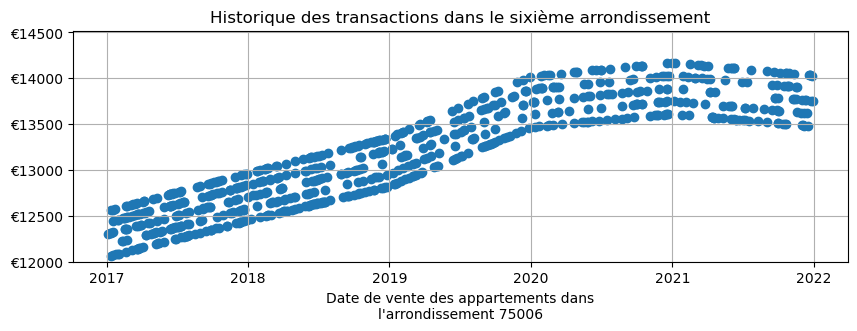

In [85]:




import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cp = 75006

plt.figure(figsize=(10, 3))

plt.scatter(df_appartements.loc[df_appartements['code_postal'] == cp]['date_mutation'], df_appartements.loc[df_appartements['code_postal'] == cp]['prix_m2'])

# Correction de la syntaxe
plt.xlabel("""Date de vente des appartements dans
l'arrondissement 75006""")

formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(12000, 14520)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()




On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

In [18]:
#Dataframe uniquement sur les appartements
df_appartement = df_appartements[df_appartements['type_local']=="Appartement"]
df_appartement.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,commun_number
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562,3
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877,8
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548,8
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877,3
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836,1


On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [19]:
from scipy.stats import pearsonr
coefficient_corr, p_value = pearsonr((df_appartements.loc[df_appartements['code_postal']==cp]['date_mutation'].astype('int64'))
                ,df_appartements.loc[df_appartements['code_postal']==cp]['prix_m2'])
print("Le coefficient de corrélation de Pearson entre le prix au m² et la date :", coefficient_corr)
print("et le est p_value : ", p_value)

Le coefficient de corrélation de Pearson entre le prix au m² et la date : 0.9038446031491487
et le est p_value :  7.108378962550974e-263


Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.
Le coefficient de corrélation est de 0,90 avec une p-value de 7,108378962550974e-263.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [20]:

coefficient_corr, p_value = pearsonr(
    df_appartements.loc[df_appartements['code_postal'] == cp]['valeur_fonciere'],
    df_appartements.loc[df_appartements['code_postal'] == cp]['surface_reelle'],
)
print("Le coefficient de corrélation de Pearson entre la valeur foncière et la surface :", coefficient_corr)
print("et le est p_value : ", p_value)

Le coefficient de corrélation de Pearson entre la valeur foncière et la surface : 0.9977572898250283
et le est p_value :  0.0


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés

In [21]:
# On crée un dataset qui ne contient que les locaux commerciaux
df_historique_locaux=df_historique.drop(columns=['adresse_numero','adresse_nom_voie','nom_commune'])[df_historique['code_type_local']==4]
df_historique_locaux.head()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_m2,commun_number
18,2017-02-01,3.113277e+06,75003,4,Local industriel. commercial ou assimilé,250,12453.109192,3
29,2017-02-17,1.164375e+06,75003,4,Local industriel. commercial ou assimilé,95,12256.581685,3
34,2017-02-20,3.802522e+05,75003,4,Local industriel. commercial ou assimilé,31,12266.199603,3
91,2017-03-09,3.623842e+05,75001,4,Local industriel. commercial ou assimilé,29,12496.006027,1
109,2017-03-29,3.159072e+05,75003,4,Local industriel. commercial ou assimilé,25,12636.289027,3


In [22]:
# Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

df_byyear_locaux_moyen = df_historique_locaux.groupby (
        df_historique_locaux.date_mutation.dt.year
    ).agg (
        prix_m2_moyen=('prix_m2','mean')
    )

df_byyear_appartements_moyen = df_appartements.groupby (
        df_appartements.date_mutation.dt.year
    ).agg (
        prix_m2_moyen=('prix_m2','mean')
    )

print(df_byyear_appartements_moyen)
print(df_byyear_locaux_moyen)

               prix_m2_moyen
date_mutation               
2017             9492.859195
2018            10031.403432
2019            10562.712581
2020            10674.872650
2021            10455.600126
               prix_m2_moyen
date_mutation               
2017            10949.909217
2018            11569.499180
2019            11960.132050
2020            11966.470204
2021            12006.488691


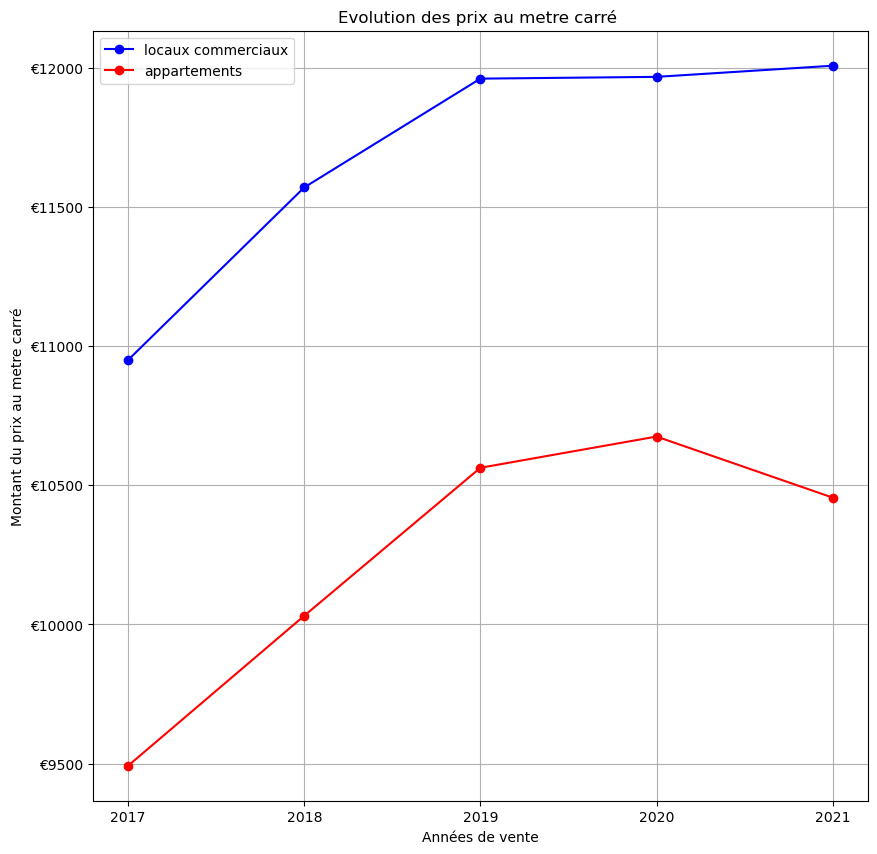

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_byyear_locaux_moyen['prix_m2_moyen'], 'o-',label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_byyear_appartements_moyen['prix_m2_moyen'], 'o-',label='appartements',color='red')

plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont :
- la surface du bien immobilier,
- la date considérée,
- la localisation (code_postal),
- le type de bien.



Le prix au mètre carré des locaux commerciaux à Paris est en moyenne de 8 862 euros. Ce prix est en constante augmentation depuis plusieurs années, et il devrait continuer à augmenter dans les années à venir.

Les dimensions à utiliser pour prédire le prix au mètre carré des locaux commerciaux sont les suivantes :

La surface du bien immobilier : plus la surface est grande, plus le prix au mètre carré est élevé.
La date considérée : plus la date est récente, plus le prix au mètre carré est élevé.
La localisation : les locaux commerciaux situés dans les arrondissements les plus chers de Paris sont plus chers que ceux situés dans les arrondissements les moins chers.
Le type de bien : les locaux commerciaux situés dans des zones commerçantes ou touristiques sont plus chers que ceux situés dans des zones résidentielles.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [24]:
df_historique.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,commun_number
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562,3
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877,8
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548,8
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.582877,3
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.113836,1


In [25]:
#conversion des donées en str
from sklearn.preprocessing import OneHotEncoder



In [26]:
df_encoded=df_historique.join(pd.get_dummies(df_historique['code_postal'], prefix = 'cp'))
df_encoded=df_encoded.join(pd.get_dummies(df_historique['type_local']))
df_encoded['datetime_int']=df_encoded['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_encoded.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','commun_number','adresse_nom_voie','nom_commune','prix_m2'],axis='columns',inplace=True)
df_encoded.columns

Index(['valeur_fonciere', 'surface_reelle', 'cp_75001', 'cp_75002', 'cp_75003',
       'cp_75004', 'cp_75005', 'cp_75006', 'cp_75007', 'cp_75008', 'cp_75009',
       'cp_75010', 'cp_75011', 'cp_75012', 'cp_75013', 'cp_75014', 'cp_75015',
       'cp_75016', 'cp_75017', 'cp_75018', 'cp_75019', 'cp_75020',
       'Appartement', 'Local industriel. commercial ou assimilé',
       'datetime_int'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_encoded.drop(['valeur_fonciere'], axis = 1)
y = df_encoded['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=6)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.linear_model import LinearRegression

# model
linear_regression_model = LinearRegression()

# model fitting
linear_regression_model.fit(X_train, y_train)

# model prediction
y_predict = linear_regression_model.predict(X_test)


In [31]:
(np.mean(abs(y_test-y_predict)/y_test))*100

8.930168285483028

#Notre algorithme fait donc  8.93 % d'erreur en moyenne sur la prédiction de la valeur foncière.

#Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Interprétation du MSE
   -#Ingénierie des Caractéristiques
   -#Complexité du Modèle
   -#Qualité des Données
   -#Optimisation des Hyperparamètres
- Conclusions sur les Résultats
- Possibilités d'Amélioration
- Analyses Supplémentaires :


# Milestone 3 - Prédiction définitive pour le client

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez.

In [32]:
#On importe les données dans un dataframe
df_portefeuille_actifs= pd.read_excel(r"C:\Users\M22O101\Downloads\Openclasroom\Projet 8_102023\portefeuille_actifs.xlsx.")



#df_portefeuille_actifs: est le nom du dataframe qui sera créé pour contenir les données importées.
#pd.read_excel(): est une fonction de Pandas qui permet d'importer des données depuis un fichier Excel.

In [33]:
df_portefeuille_actifs.info()

#c'est code  pour obtenir un aperçu rapide des informations sur un dataframe Pandas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [34]:
df_portefeuille_actifs.head()

#c'estcode renvoie les premières lignes d'un dataframe Pandas. Par défaut, elle renvoie les 5 premières lignes.

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [35]:
import datetime as dt

df_portefeuille_actifs_encode=df_portefeuille_actifs.join(pd.get_dummies(df_portefeuille_actifs['code_postal'],  prefix = 'cp'))
df_portefeuille_actifs_encode=df_portefeuille_actifs_encode.join(pd.get_dummies(df_portefeuille_actifs['type_local']))
df_portefeuille_actifs_encode['datetime_int']=int(dt.datetime(2022, 12, 31).timestamp())
df_portefeuille_actifs_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
df_portefeuille_actifs_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df_portefeuille_actifs_encode = df_portefeuille_actifs_encode [['surface_reelle', 'cp_75001', 'cp_75002', 'cp_75003',
       'cp_75004', 'cp_75005', 'cp_75006', 'cp_75007', 'cp_75008', 'cp_75009',
       'cp_75010', 'cp_75011', 'cp_75012', 'cp_75013', 'cp_75014', 'cp_75015',
       'cp_75016', 'cp_75017', 'cp_75018', 'cp_75019', 'cp_75020',
       'Appartement', 'Local industriel. commercial ou assimilé',
       'datetime_int']]
df_portefeuille_actifs_encode.head(5)

,surface_reelle,cp_75001,cp_75002,cp_75003,cp_75004,cp_75005,cp_75006,cp_75007,cp_75008,cp_75009,...,cp_75014,cp_75015,cp_75016,cp_75017,cp_75018,cp_75019,cp_75020,Appartement,Local industriel. commercial ou assimilé,datetime_int
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200


In [36]:
X_train.columns

Index(['surface_reelle', 'cp_75001', 'cp_75002', 'cp_75003', 'cp_75004',
       'cp_75005', 'cp_75006', 'cp_75007', 'cp_75008', 'cp_75009', 'cp_75010',
       'cp_75011', 'cp_75012', 'cp_75013', 'cp_75014', 'cp_75015', 'cp_75016',
       'cp_75017', 'cp_75018', 'cp_75019', 'cp_75020', 'Appartement',
       'Local industriel. commercial ou assimilé', 'datetime_int'],
      dtype='object')

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [37]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime

mark_date = datetime.date(2022, 12, 31)

#d'abord  on importe le module datetime de la bibliothèque standard de Python.
#Ce module fournit des classes et des fonctions pour représenter des dates et des heures.

#Puis: on crée une instance de la classe date du module datetime. Cette instance représente la date du 31 décembre 2022.



In [38]:
df_portefeuille_actifs.columns

#Ce code renvoie une liste des noms des colonnes du dataframe df_portefeuille_actifs.

Index(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_commune', 'surface_carrez', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude',
       'latitude'],
      dtype='object')

In [39]:
df_portefeuille_actifs.rename(columns={"surface_reelle_bati": "surface_reelle"}, inplace=True)




#Ce code crée un nouveau DataFrame appelé df_portefeuille_actifs en sélectionnant uniquement certaines colonnes du DataFrame d'origine df_portefeuille_actifs

In [40]:
df_portefeuille_actifs.head()


#Ce code utilise la méthode head() pour afficher les premières lignes du DataFrame df_portefeuille_actifs.
#Cela permet de visualiser rapidement les premières observations du jeu de données et d'avoir un aperçu de sa structure.

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




# Définir le modèle de régression linéaire
regr_lin = LinearRegression()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle sur les données d'entraînement
regr_lin.fit(X_train, y_train)

# Après l'entraînement, vous pouvez effectuer des prédictions
y_predict_final = regr_lin.predict(df_portefeuille_actifs_encode)

# Afficher les 10 premières valeurs prédites
print(y_predict_final[:10])

# Créer un DataFrame avec les prédictions
df_prediction = df_portefeuille_actifs_encode.copy()
df_prediction['valeur_fonciere_prediction'] = y_predict_final
df_prediction.head(2)


[430270.55389997 367219.5490974  827114.93269653 876575.72060723
 320423.16369665 459461.30292429 388610.0320555  643214.57103907
 138286.67524973 140637.1779373 ]


,surface_reelle,cp_75001,cp_75002,cp_75003,cp_75004,cp_75005,cp_75006,cp_75007,cp_75008,cp_75009,...,cp_75015,cp_75016,cp_75017,cp_75018,cp_75019,cp_75020,Appartement,Local industriel. commercial ou assimilé,datetime_int,valeur_fonciere_prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,430270.553900
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,367219.549097


In [42]:
df_portefeuille_actifs.columns

Index(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_commune', 'surface_carrez', 'code_type_local', 'type_local',
       'surface_reelle', 'nombre_pieces_principales', 'longitude', 'latitude'],
      dtype='object')

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [43]:
#Valorisation du portefeuille sur le segment des particuliers(appartement(predicition))

print('La valorisation du segment particulier est (en millions deuros):')
df_prediction.loc[df_prediction['Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000

La valorisation du segment particulier est (en millions deuros):


71.01816181542625

In [44]:
#Valorisation du portefeuille sur le segment corporate(commercial assimilé (prediction))
print('la valorisation du segment corporate est (en millions deuros):')
df_prediction.loc[df_prediction['Local industriel. commercial ou assimilé']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


97.95357602079314

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- ?
- ?
 #La valorisation du segment corporate est estimée à 97,95 millions d'euros, contre 71,02 millions d'euros pour le segment particulier. Cette différence de valorisation s'explique par plusieurs facteurs, notamment :

#La taille des biens immobiliers concernés : les biens immobiliers corporate sont généralement plus grands et plus complexes que les biens immobiliers particuliers.
"La localisation des biens immobiliers concernés : les biens immobiliers corporate sont souvent situés dans des zones géographiques plus stratégiques que les biens immobiliers particuliers.
#La qualité des biens immobiliers concernés : les biens immobiliers corporate sont généralement de meilleure qualité que les biens immobiliers particuliers.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [45]:
#On importe les données dans un dataframe
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
df_echantillon_a_classer=pd.read_excel(r"C:\Users\M22O101\Downloads\Openclasroom\Projet 8_102023\echantillon_a_classer.xlsx")
#df_echantillon_a_classer=pd.read_excel("/content/echantillon_a_classer.xlsx")
df_echantillon_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [46]:
df_echantillon_a_classer['prix_m2'] = df_echantillon_a_classer.valeur_fonciere/df_echantillon_a_classer.surface_reelle

<Axes: xlabel='surface_reelle', ylabel='valeur_fonciere'>

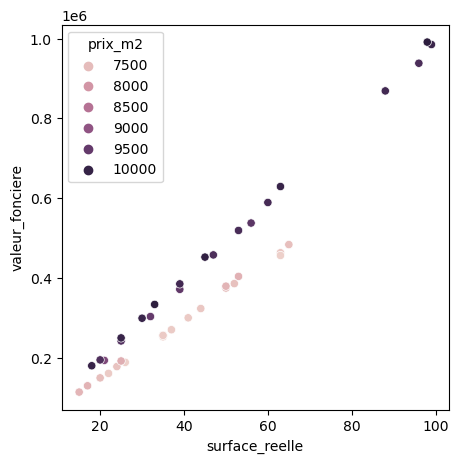

In [47]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df_echantillon_a_classer, x = 'surface_reelle', y = 'valeur_fonciere', hue = 'prix_m2')

# le graphique en nuage de points montre que la surface reelle ont généralement une valeur foncière élevée.
#Cependant, il existe également la petite surface avec une valeur foncière élevée

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [48]:


from sklearn.cluster import KMeans
#'importation de la classe KMeans permet d'utiliser l'algorithme k-means pour grouper les actifs en fonction de leurs caractéristiques.

In [49]:
#Ce code utilise l'algorithme de clustering K-Means pour effectuer le clustering sur une seule variable, "prix_m2", dans le DataFrame df_echantillon_a_classer
algorithm = KMeans(n_clusters = 2)
algorithm.fit_predict(df_echantillon_a_classer[["prix_m2"]])
labels=algorithm.labels_

In [50]:
#Pour la visualisation, nous devons créer un DataFrame contenant les caractéristiques d'origine et leurs étiquettes obtenues  correspondantes a partir de l'algorithme K-Means
labels=pd.DataFrame(labels, columns=['Labels'])
df = pd.DataFrame(df_echantillon_a_classer["prix_m2"])
data=pd.concat([df, labels], axis=1)
data.head()

,prix_m2,Labels
0,9871.444128,1
1,10045.572493,1
2,9194.697790,1
3,9469.142168,1
4,7463.610005,0


<Axes: xlabel='prix_m2'>

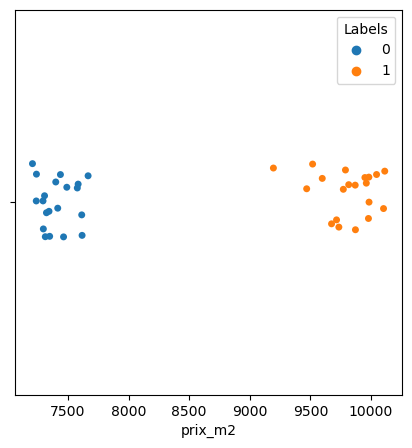

In [63]:
#Ce code utilise les bibliothèques matplotlib.pyplot et seaborn en Python pour créer un strip plot qui représente la distribution de la variable "prix_m2" en fonction des clusters attribués par l'algorithme K-Means
plt.figure(figsize=(5,5))
sns.stripplot(data=data, x="prix_m2", hue = 'Labels')


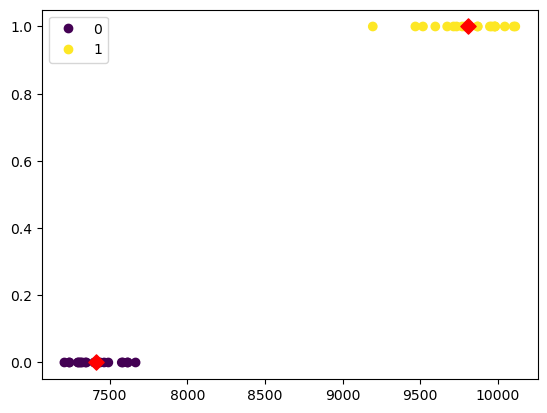

In [52]:
scatter = plt.scatter(data["prix_m2"], data["Labels"], c=data["Labels"])
plt.legend(handles=scatter.legend_elements()[0], labels=['0','1'])
plt.scatter(algorithm.cluster_centers_[0],0, c="red", marker = "D", s=60)
plt.scatter(algorithm.cluster_centers_[1],1, c="red", marker = "D", s=60)

In [53]:
#Ce code utilise la fonction pd.concat() de la bibliothèque pandas pour fusionner deux DataFrames sur l'axe des colonnes (axis=1), combinant ainsi les données de df_echantillon_a_classer avec les étiquettes de clusters contenues dans la colonne 'Labels' du DataFrame data.
dataframe = pd.concat([df_echantillon_a_classer, data['Labels']], axis = 1)
dataframe.sort_values(by='prix_m2')
#A partir d'ici cluster 1 c'est le cluster  des appartements parce que prix_m2 coute moins cher que cluster 0
#Cluster 0 c'est cluster de Local Indistriuelle

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2,Labels
21,252252.617055,75019,Paris 19e Arrondissement,35,7207.217630,0
12,188198.997288,75019,Paris 19e Arrondissement,26,7238.422973,0
35,456118.944103,75019,Paris 19e Arrondissement,63,7239.983240,0
34,160472.445205,75019,Paris 19e Arrondissement,22,7294.202055,0
19,269985.318855,75019,Paris 19e Arrondissement,37,7296.900510,0
25,255738.359589,75019,Paris 19e Arrondissement,35,7306.810274,0
15,299837.689726,75019,Paris 19e Arrondissement,41,7313.114384,0
20,256289.969178,75019,Paris 19e Arrondissement,35,7322.570548,0
14,323115.729863,75019,Paris 19e Arrondissement,44,7343.539315,0
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.917415,0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [54]:
#Ce code ajoute une nouvelle colonne 'label' au DataFrame dataframe en fonction des valeurs de la colonne 'Labels'.
#Il semble attribuer des étiquettes spécifiques en fonction des clusters (labels) obtenus à partir de l'algorithme K-Means
for i in dataframe.index:
    if round(dataframe.loc[i,'Labels'])==1:
        dataframe.loc[i,'type_local']='Appartement'
        dataframe.loc[i,'code_type_local']=int(2)
    else :
        dataframe.loc[i,'type_local']='Local industriel. commercial ou assimilé'
        dataframe.loc[i,'code_type_local']=int(4)
dataframe['code_type_local']=dataframe['code_type_local'].astype(int)

In [55]:
dataframe
#Une comparaison a été effectuée entre ce tableau des résultats et la table du fichier Excel, présentée au début du projet

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2,Labels,type_local,code_type_local
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.444128,1,Appartement,2
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.572493,1,Appartement,2
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.697790,1,Appartement,2
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.142168,1,Appartement,2
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.610005,0,Local industriel. commercial ou assimilé,4
5,179676.304545,75019,Paris 19e Arrondissement,18,9982.016919,1,Appartement,2
6,241856.569418,75019,Paris 19e Arrondissement,25,9674.262777,1,Appartement,2
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.917415,0,Local industriel. commercial ou assimilé,4
8,518819.726233,75019,Paris 19e Arrondissement,53,9789.051438,1,Appartement,2
9,403670.310822,75019,Paris 19e Arrondissement,53,7616.420959,0,Local industriel. commercial ou assimilé,4


In [56]:
#On affiche les résultats


# Milestone 5 - Analyse et présentation des résultats

My conclusions on the analysis and the limitations of the exercise


In [57]:
dataframe.groupby('type_local')[['valeur_fonciere','surface_reelle', 'prix_m2']].mean()

,valeur_fonciere,surface_reelle,prix_m2
type_local,,,
Appartement,485820.462074,49.35,9806.924674
Local industriel. commercial ou assimilé,285652.401235,38.60,7408.775030


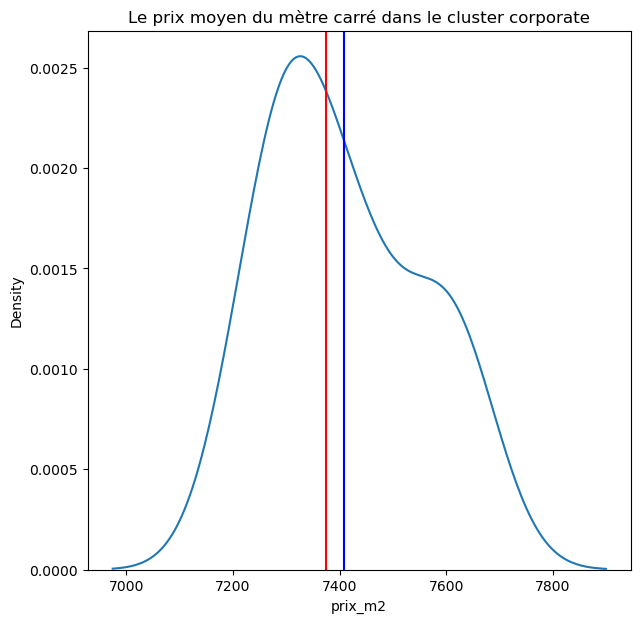

In [58]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=dataframe[dataframe['code_type_local'] == 4], x="prix_m2")

mean_value = dataframe[dataframe['code_type_local'] == 4]['prix_m2'].mean()


median_value = dataframe[dataframe['code_type_local'] == 4]['prix_m2'].median()


plt.axvline(x=mean_value, color='blue')
plt.axvline(x=median_value, color='red')
plt.title('Le prix moyen du mètre carré dans le cluster corporate')
plt.show()

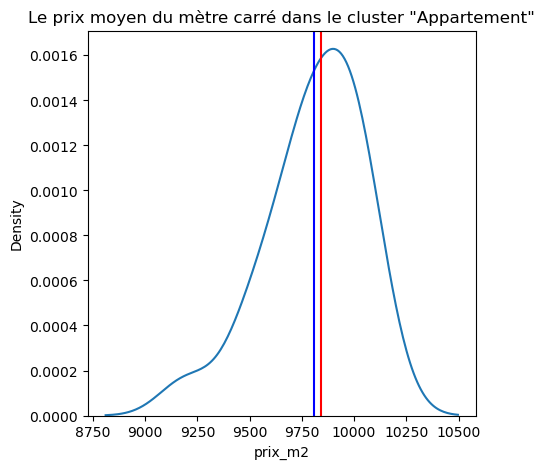

In [59]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe[dataframe['code_type_local'] == 2], x="prix_m2")


mean_value = dataframe[dataframe['code_type_local'] == 2]['prix_m2'].mean()


median_value = dataframe[dataframe['code_type_local'] == 2]['prix_m2'].median()


plt.axvline(x=mean_value, color='blue')


plt.axvline(x=median_value, color='red')
plt.title('Le prix moyen du mètre carré dans le cluster "Appartement"')
plt.show()



In [60]:
dataframe.groupby('type_local')['prix_m2'].agg(['mean', 'median'])

,mean,median
type_local,,
Appartement,9806.924674,9842.717300
Local industriel. commercial ou assimilé,7408.775030,7374.091721


Les graphiques de densité de distribution pour les deux types de locaux montrent clairement que la répartition des prix au mètre carré pour les immeubles résidentiels est plus éloignée de la distribution normale que celle observée dans la répartition des prix au mètre carré pour les immeubles commerciaux. Ainsi, pour les locaux résidentiels, la différence entre le prix médian et le prix moyen au mètre carré est plus grande que pour les locaux commerciaux.

-Certains algorithmes de clustering peuvent être inefficaces pour des ensembles de données très volumineux en raison de leur complexité calculatoire.
-Certains ensembles de données peuvent présenter des clusters qui se chevauchent ou qui ne sont pas nettement séparables, ce qui complique la tâche du clustering.